In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
plt.style.use('ggplot')
data = pd.read_csv("C:/Users/DELL/Downloads/train.csv")
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


Understanding Data

In [119]:
data.shape #Total number of rows and columns

(2000, 21)

In [120]:
data.head() #Displays first five rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [121]:
data.columns #Displays all columns in the dataset

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [122]:
data.dtypes #Displays data types of each column

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc               float64
four_g           float64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [123]:
data.describe() #Gives details about our dataset's features

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Dropping Duplicates

In [124]:
data.drop_duplicates(inplace= True)

Dropping columns 

In [125]:
 data.drop(columns= ['m_dep','sc_h','sc_w','px_height','px_width','three_g'], inplace= True)
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,188.0,2.0,2.0,2549.0,19,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,136.0,3.0,6.0,2631.0,7,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,145.0,5.0,6.0,2603.0,9,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,131.0,6.0,9.0,2769.0,11,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,141.0,2.0,14.0,1411.0,15,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,106.0,6.0,14.0,668.0,19,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,187.0,4.0,3.0,2032.0,16,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,108.0,8.0,3.0,3057.0,5,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,145.0,5.0,5.0,869.0,19,1,1,0


Renaming Columns

In [126]:
data = data.rename(columns= {'battery_power':'Battery_Power','blue':'Bluetooth','clock_speed':'Clock_speed',
                             'dual_sim' : 'Dual_SIM', 'fc': 'Front_Camera_Megapixels','four_g' : 'Four_G', 
                             'int_memory' : 'Internal_Memory', 'mobile_wt' : 'Mobile_Weight',
                             'n_cores' : 'number_of_cores', 'pc' : 'Primary_Camera_MP', 'ram' : 'RAM',
                             'talk_time' : 'Talk_Time', 'touch_screen' : 'Touch_Screen', 'wifi' : 'WiFi',
                             'price_range' : 'Price_Range'})
data

,Battery_Power,Bluetooth,Clock_speed,Dual_SIM,Front_Camera_Megapixels,Four_G,Internal_Memory,Mobile_Weight,number_of_cores,Primary_Camera_MP,RAM,Talk_Time,Touch_Screen,WiFi,Price_Range
0,842,0,2.2,0,1.0,0.0,7.0,188.0,2.0,2.0,2549.0,19,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,136.0,3.0,6.0,2631.0,7,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,145.0,5.0,6.0,2603.0,9,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,131.0,6.0,9.0,2769.0,11,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,141.0,2.0,14.0,1411.0,15,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,106.0,6.0,14.0,668.0,19,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,187.0,4.0,3.0,2032.0,16,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,108.0,8.0,3.0,3057.0,5,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,145.0,5.0,5.0,869.0,19,1,1,0


Checking for nulls

In [127]:
data.isna().sum()

Battery_Power              0
Bluetooth                  0
Clock_speed                0
Dual_SIM                   0
Front_Camera_Megapixels    5
Four_G                     5
Internal_Memory            5
Mobile_Weight              4
number_of_cores            4
Primary_Camera_MP          5
RAM                        2
Talk_Time                  0
Touch_Screen               0
WiFi                       0
Price_Range                0
dtype: int64

Filling null values

In [128]:
avgValue = pd.to_numeric(data['Front_Camera_Megapixels'], errors= 'coerce').mean()
avgValue = int(avgValue)
data['Front_Camera_Megapixels'].fillna(avgValue, inplace= True)
data['Four_G'].fillna(0, inplace= True)
data['Four_G']
data['Internal_Memory'].fillna(data['Internal_Memory'].mean(),inplace= True)
data['Internal_Memory']
data['Mobile_Weight'].fillna(data['Mobile_Weight'].mean(),inplace= True)
data['Mobile_Weight']
data['Primary_Camera_MP'].fillna(data['Primary_Camera_MP'].mean(), inplace= True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_19240\2808186983.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Front_Camera_Megapixels'].fillna(avgValue, inplace= True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_19240\2808186983.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [129]:
data.dropna(subset = ['RAM'], inplace= True) #Dropping null rows in RAM column

In [130]:
data.dropna(subset= ['number_of_cores'], inplace= True) #Dropping null rows in number_of_cores column

In [131]:
data.isnull().sum()
data

,Battery_Power,Bluetooth,Clock_speed,Dual_SIM,Front_Camera_Megapixels,Four_G,Internal_Memory,Mobile_Weight,number_of_cores,Primary_Camera_MP,RAM,Talk_Time,Touch_Screen,WiFi,Price_Range
0,842,0,2.2,0,1.0,0.0,7.0,188.0,2.0,2.0,2549.0,19,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,136.0,3.0,6.0,2631.0,7,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,145.0,5.0,6.0,2603.0,9,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,131.0,6.0,9.0,2769.0,11,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,141.0,2.0,14.0,1411.0,15,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,106.0,6.0,14.0,668.0,19,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,187.0,4.0,3.0,2032.0,16,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,108.0,8.0,3.0,3057.0,5,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,145.0,5.0,5.0,869.0,19,1,1,0


Normalizing the data

In [144]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data),columns = data.columns)

data

,Battery_Power,Bluetooth,Clock_speed,Dual_SIM,Front_Camera_Megapixels,Four_G,Internal_Memory,Mobile_Weight,number_of_cores,Primary_Camera_MP,RAM,Talk_Time,Touch_Screen,WiFi,Price_Range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.900000,0.142857,0.10,0.612774,0.944444,0.0,1.0,0.333333
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.466667,0.285714,0.30,0.634687,0.277778,1.0,0.0,0.666667
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.541667,0.571429,0.30,0.627205,0.388889,1.0,0.0,0.666667
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.425000,0.714286,0.45,0.671566,0.500000,0.0,0.0,0.666667
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.508333,0.142857,0.70,0.308658,0.722222,1.0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.216667,0.714286,0.70,0.110102,0.944444,1.0,0.0,0.000000
1991,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.891667,0.428571,0.15,0.474613,0.777778,1.0,1.0,0.666667
1992,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.233333,1.000000,0.15,0.748530,0.166667,1.0,0.0,1.000000
1993,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.541667,0.571429,0.25,0.163816,0.944444,1.0,1.0,0.000000


Splitting dataset for testing and training

In [145]:
x = data.drop('Price_Range',axis = 1)
y = data['Price_Range']
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=48)
model = LogisticRegression() #Logistic Regression
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred) #Calculates accuracy score for predicted values against actual values
confusion = confusion_matrix(y_test, y_pred) #True positive, true negative, false positive, false negative
class_report = classification_report(y_test,y_pred) #Evaluate the performance of a classification model
print('Accuracy: ', accuracy)
print('Confusion Matrix: ',confusion)
print('Classification Report: ',class_report)

Accuracy:  0.9373433583959899
Confusion Matrix:  [[286  11]
 [ 14  88]]
Classification Report:                precision    recall  f1-score   support

           0       0.95      0.96      0.96       297
           1       0.89      0.86      0.88       102

    accuracy                           0.94       399
   macro avg       0.92      0.91      0.92       399
weighted avg       0.94      0.94      0.94       399



Graphs

Box Plot

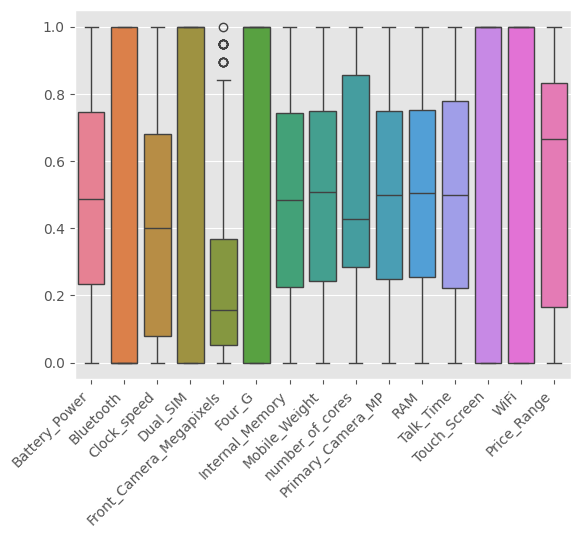

In [137]:
sns.boxplot(data=data)
plt.xticks(rotation=45, ha='right')
plt.show()

Feature Importance

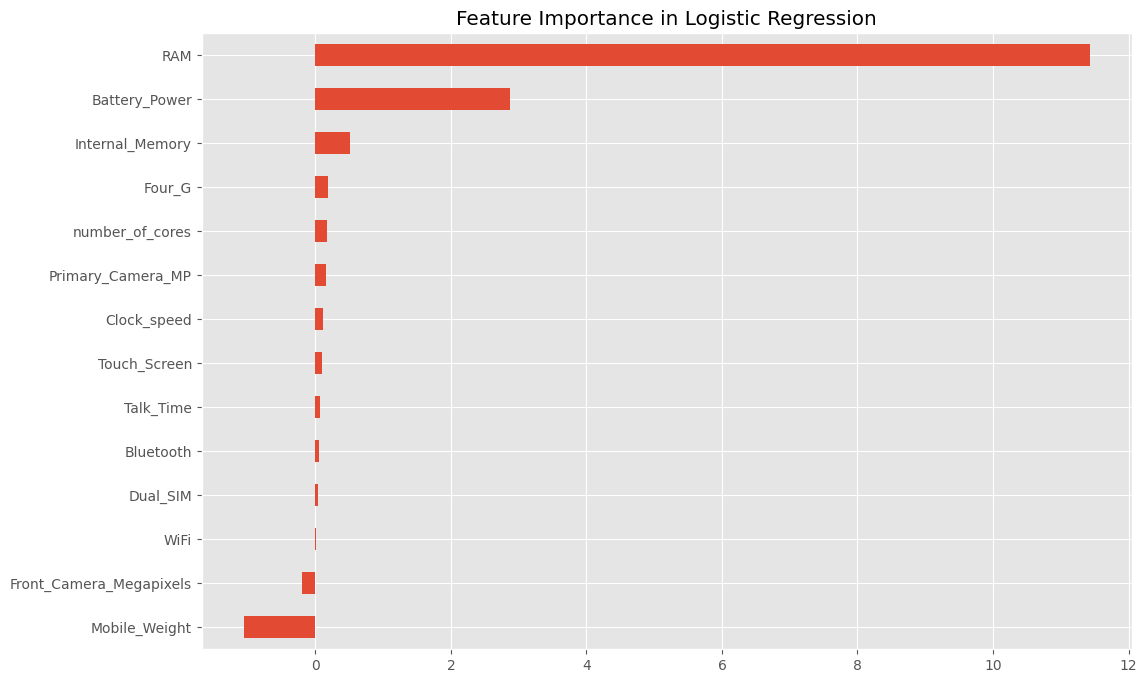

In [143]:
coefficients = pd.Series(model.coef_[0], index=X_train.columns)
coefficients = coefficients.sort_values()
plt.figure(figsize=(12,8))
coefficients.plot(kind='barh')
plt.title('Feature Importance in Logistic Regression')
plt.show()
